# 项目：TMDB数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 在本报告中，对TMDB的数据进行探索和分析，尝试解决的问题有：1.年份和投票得分的关系；2.票房和其他属性是否相关；3.导演和票房的关系

In [813]:
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：对数据进行清理

### 常规属性

In [814]:
# 加载数据并打印几行。进行这几项操作，来检查数据类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv("tmdb-movies.csv")

In [815]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [816]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 数据信息
- id                      
- imdb_id                 
- popularity              受欢迎程度
* budget                  预算
* revenue                 盈利
* original_title          原名
* cast                    卡司
* homepage                网站
* director                导演
* tagline                 宣传词
* keywords                关键词
* overview                简介
* runtime                 时长
* genres                  类型
* production_companies    公司
* release_date            上映时间
* vote_count              投票数
* vote_average            投票平均分
* release_year            上映年
* budget_adj              
* revenue_adj             

## 清理数据
### 1.删除掉不需要的列：budget_adj, revenue_adj, homepage, tagline, overview

In [817]:
df.drop(['budget_adj','imdb_id','revenue_adj','homepage','tagline','overview'],axis=1, inplace=True)

In [818]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [819]:
# 增加票房列
df['gross'] = df['revenue'] +df['budget']

### 2.是否有空值

In [820]:
df.isnull().any(1).sum()

2199

In [821]:
df.isnull().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
director                 True
keywords                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
gross                   False
dtype: bool

In [822]:
df.drop(df[df.genres.isnull()].index,inplace=True)

In [823]:
### 所有的空值来源都是文字列，因此用""代替NAN
df.fillna(value="",inplace=True)

In [824]:
###检查是否没有空值
df.isnull().any().sum()

0

### 3.去重

In [825]:
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,gross
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30967000


In [826]:
df[df['id'] == 42194]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,gross
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30967000
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30967000


In [827]:
### 去掉这条重复的数据
df.drop_duplicates(inplace=True)

In [828]:
### 确定没有重复数据
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,gross


###  去掉票房为0的电影

In [829]:
df = df.drop(index=df[df.budget==0].index)
df = df.drop(index=df[df.revenue==0].index)

In [830]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,gross
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,1.448903e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,2.078680e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,1.500000e+01
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,2.947348e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,7.287788e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,1.728915e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,3.018506e+09


## 修改数据类型

In [831]:
### 查看现有数据类型
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
gross                     int64
dtype: object

##### 将release_date设置为datetime
    

In [832]:
df['release_datetime']= pd.to_datetime(df['release_date'])

### 由于release_date中年份没有指定前两位，所以转换后20世纪的电影年份写的都是错的，需要进行处理

In [833]:
df['release_datetime'] = df['release_datetime'].apply(lambda x : x if(x < pd.to_datetime("2020/01/01")) else x - pd.DateOffset(years=100))

<a id='eda'></a>
## 探索性数据分析

### 年份和投票有没有关系(刚上映的电影popularity非常高，但是过了数年甚至数十年能够仍然保持popularity的老电影评分是否都高)

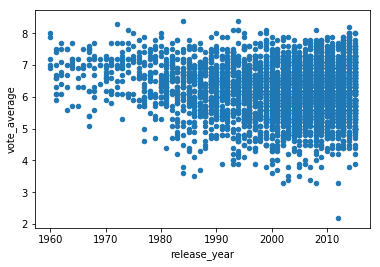

In [834]:
### 查看每年电影的投票得分
df.plot(kind='scatter',x='release_year',y='vote_average')

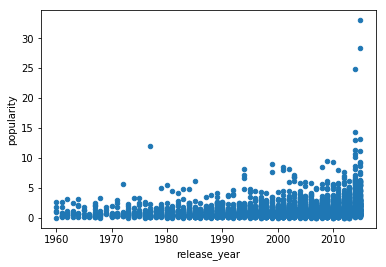

In [835]:
### 查看电影的popularity和年度的关系
df.plot(kind='scatter',x ='release_year',y='popularity')

### 可见越近的电影，投票得分和受欢迎度跨度越大
### 解决方案：1.将所有评分的中位数为界限，设置颜色；2.选择popularity>1的电影，生成一个df_pop；3.作图检验

In [836]:
# 获得vote得分的中位值
df.vote_average.median()
# df_pop=df[df.popularity>1]
# 直接使用上面的df_pop的方式会报问题A value is trying to be set on a copy of a slice from a DataFrame.
df_pop = df.loc[df[df.popularity>1].index]

In [837]:
df.median()
# 根据投票得分是否高于中位数来赋予颜色
df['vote_color'] = df['vote_average'].apply(lambda x : 'r' if x>df.vote_average.median() else 'b')

In [838]:
df.query('vote_color=="r"').shape

(1810, 18)

In [839]:
df.query('vote_color=="b"').shape

(2044, 18)

In [840]:
df_pop.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,gross
count,1524.000000,1524.000000,1.524000e+03,1.524000e+03,1524.000000,1524.000000,1524.000000,1524.000000,1.524000e+03
mean,51246.217848,2.197611,5.799872e+07,2.054079e+08,112.751969,1089.837270,6.440223,2003.542651,2.634066e+08
std,80715.845179,1.933462,5.284277e+07,2.361673e+08,20.476501,1154.539823,0.754946,10.889049,2.738600e+08
min,5.000000,1.000194,2.100000e+01,4.200000e+01,63.000000,10.000000,3.700000,1960.000000,6.300000e+01
25%,1734.750000,1.230379,2.000000e+07,5.894727e+07,98.000000,376.750000,5.900000,1999.000000,8.713838e+07
50%,10084.000000,1.616458,4.000000e+07,1.312332e+08,109.000000,702.000000,6.400000,2007.000000,1.810945e+08
75%,62351.500000,2.466204,8.000000e+07,2.594294e+08,124.000000,1333.000000,7.000000,2012.000000,3.410136e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,216.000000,9767.000000,8.400000,2015.000000,3.018506e+09


In [841]:
# 根据投票得分是否高于中位数来赋予颜色
df_pop['vote_color'] = df_pop['vote_average'].apply(lambda x : 'r' if x>df_pop.vote_average.median() else 'b')

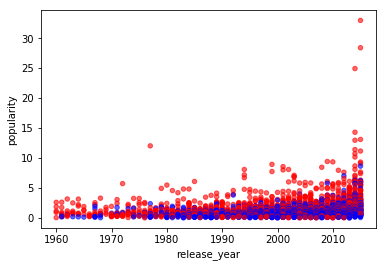

In [842]:
# 查看所有电影的评分分布情况
df.plot(kind='scatter',x ='release_year',y='popularity',c=df['vote_color'].tolist(),alpha=0.6)

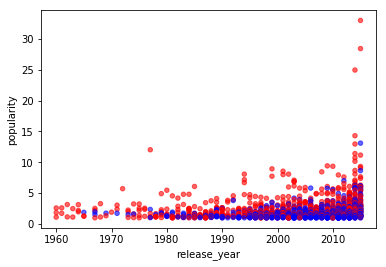

In [843]:
# 查看所有流行度大于1的电影的评分分布情况
df_pop.plot(kind='scatter',x ='release_year',y='popularity',c=df_pop['vote_color'].tolist(),alpha=0.6)

### 从上面的两张图可以发现，其实每个年份的电影的vote_average得分都是有高有低，但是popularity比较高的电影里面，越久远的电影vote_average得分都是高的，所以经过时间考验还能流行的老电影都是评分比较高的。

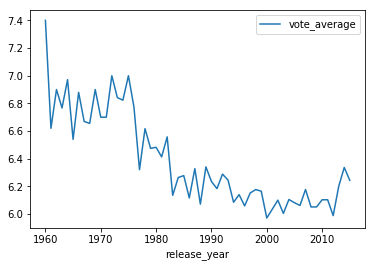

In [844]:
# 画出每年上榜电影的平均vote_average的走线图
df.groupby('release_year').mean().plot(y='vote_average')

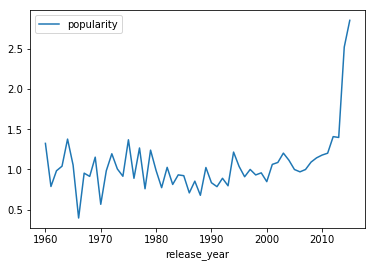

In [845]:
# 画出每年上榜电影的平均popularity的走线图
df.groupby('release_year').mean().plot(y='popularity')


### 从图中可以看出，年份越近popularity越高，但是平均投票得分是逐渐降低了

### 研究问题 2 最受欢迎的电影类型是什么

In [846]:
# 先得到一个列表，记录所有的电影类别

In [847]:
# 因为df中的grenres是字符串，所以要先拆开成一个list
genre_list = [x for j in df.genres.apply(lambda x : str(x).split("|")) for x in j]

In [848]:
def list_unique(lists):
    list_u = []
    for item in lists:
        if item not in list_u and item != "":
            list_u.append(item)
    return list_u

In [849]:
len(list_unique(genre_list))
# 一共二十种影片类型

20

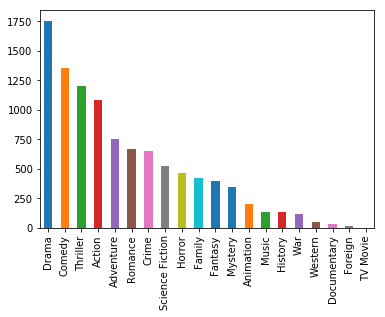

In [850]:
pd.value_counts(genre_list).plot(kind='bar')

#### 在全部影片中，最多的类型是Drama. Comedy,Thriller,Action,Romance

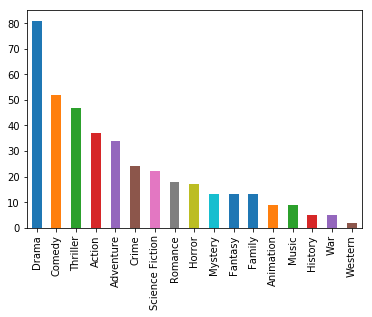

In [776]:
df_2015 = df[df.release_year==2015]
# 拆分genre
genre_list_2015 = [x for j in df_2015.genres.apply(lambda x : x.split("|")) for x in j]
# 查看2010年全部的电影类型分布情况
pd.value_counts(genre_list_2015).plot(kind='bar')

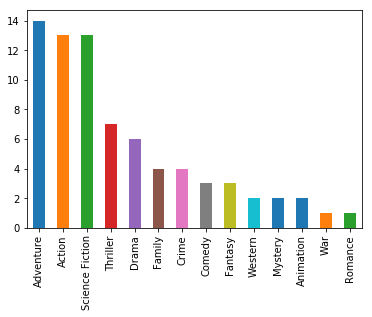

In [777]:
# 计算出2010年的时候popularity高的电影属于什么类型
df_2015_pop = df_2015[df_2015.popularity>5]
# 拆分genre
genre_list_2015_pop = [x for j in df_2015_pop.genres.apply(lambda x : x.split("|")) for x in j]
pd.value_counts(genre_list_2015_pop).plot(kind='bar')

#### 2015年最受欢迎的电影是Adventure ,Action ,Science Fiction 和Thriller

#### 在2010年，最受欢迎的影片类型是什么

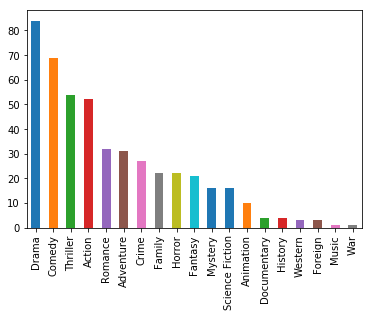

In [778]:
df_2010 = df[df.release_year==2010]
# 拆分genre
genre_list_2010 = [x for j in df_2010.genres.apply(lambda x : x.split("|")) for x in j]
# 查看2010年全部的电影类型分布情况
pd.value_counts(genre_list_2010).plot(kind='bar')

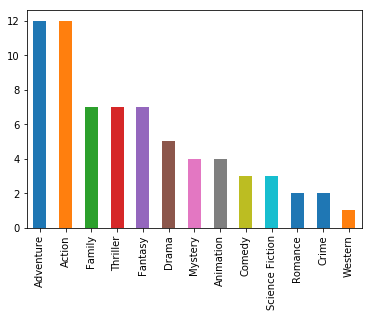

In [779]:
# 计算出2010年的时候popularity度大于1的电影属于什么类型
df_2010_pop = df_2010[df_2010.popularity>2]
# 拆分genre
genre_list_2010_pop = [x for j in df_2010_pop.genres.apply(lambda x : x.split("|")) for x in j]
pd.value_counts(genre_list_2010_pop).plot(kind='bar')

### 由上两图对比可见，2010年的电影中，Adventure和Action类型的电影是最受欢迎的。

In [780]:
years_1990 = ('1990','1991','1992','1993','1994','1995','1996','1997','1998','1999')

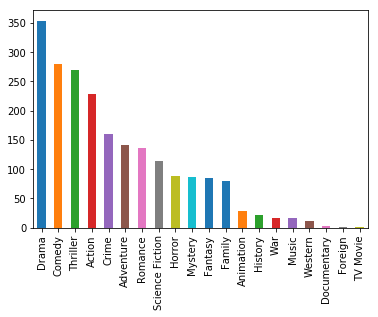

In [781]:
df_1990 = df[df.release_year.isin(years_1990)]
# 拆分genre
genre_list_1990 = [x for j in df_1990.genres.apply(lambda x : x.split("|")) for x in j]
pd.value_counts(genre_list_1990).plot(kind='bar')

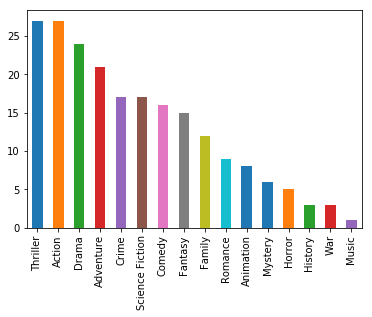

In [782]:
# 计算出1990年的时候popularity度大于2的电影属于什么类型
df_1990_pop = df_1990[df_1990.popularity>2]
# 拆分genre
genre_list_1990_pop = [x for j in df_1990_pop.genres.apply(lambda x : x.split("|")) for x in j]
pd.value_counts(genre_list_1990_pop).plot(kind='bar')

#### 1990年，最受欢迎的电影是Action和Thriller

## 研究问题 3 票房和导演的关系，是否大导演的票房高？

In [786]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'gross',
       'release_datetime', 'vote_color'],
      dtype='object')

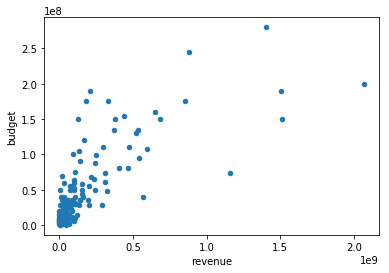

In [787]:
df_2015.plot(kind='scatter', x ='revenue',y='budget')

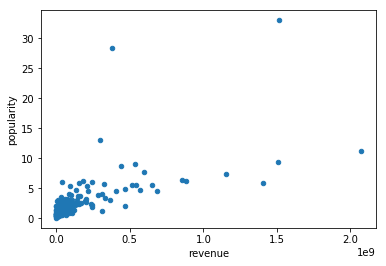

In [788]:
df_2015.plot(kind='scatter', x ='revenue',y='popularity')

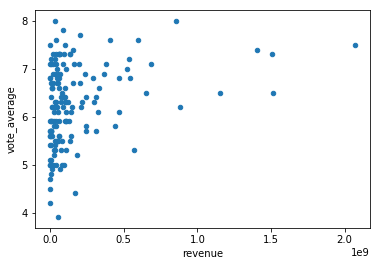

In [789]:
df_2015.plot(kind='scatter', x ='revenue',y='vote_average')

### 票房和budget的关系最大，和popularity正相关，和vote_average相关度最低

问题 : 对于 2010 年生产的电影，票房最高的电影是那些

In [851]:
df_2015_high_rev = df_2015[df_2015.revenue > 100000000]

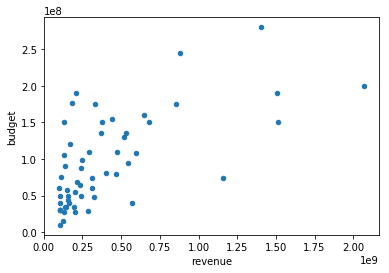

In [852]:
df_2015_high_rev.plot(kind='scatter', x ='revenue',y='budget')

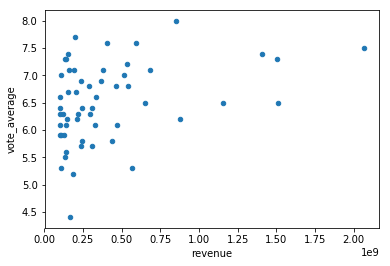

In [793]:
df_2015_high_rev.plot(kind='scatter', x ='revenue',y='vote_average')

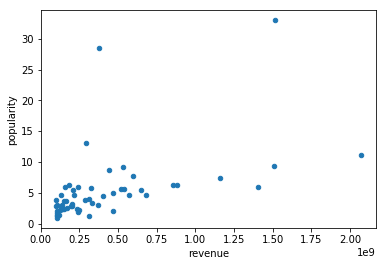

In [794]:
df_2015_high_rev.plot(kind='scatter', x ='revenue',y='popularity')

In [795]:
### 统计出现次数最多的导演
director_list = pd.value_counts([x for j in df.director.apply(lambda x : x.split("|")) for x in j])

In [796]:
##作品超过10部的导演被认为是高产导演
director_list_big = director_list[director_list >=10]
director_list_big.index

Index(['Steven Spielberg', 'Clint Eastwood', 'Ridley Scott', 'Woody Allen',
       'Martin Scorsese', 'Steven Soderbergh', 'Robert Rodriguez',
       'Tim Burton', 'Robert Zemeckis', 'Brian De Palma', 'Oliver Stone',
       'Renny Harlin', 'Ron Howard', 'Wes Craven', 'Tony Scott',
       'Joel Schumacher', 'Richard Donner', 'Francis Ford Coppola',
       'Peter Farrelly', 'Walter Hill', 'Joel Coen', 'Barry Levinson',
       'Rob Reiner', 'John Carpenter', 'Quentin Tarantino', 'Michael Bay',
       'Kevin Smith', 'Peter Jackson', 'Richard Linklater', 'Bobby Farrelly',
       'Spike Lee', 'John Landis', 'Brett Ratner', 'Sam Raimi',
       'David Fincher', 'Paul W.S. Anderson', 'Shawn Levy', 'Rob Cohen',
       'Roman Polanski', 'Michael Mann', 'David Cronenberg', 'Ivan Reitman'],
      dtype='object')

In [797]:
# 求出2010年，大导演的票房情况

In [802]:
df_2010_big = pd.DataFrame(columns=df_2010.columns)
for director in director_list_big.index:
    #print(director)
    df_2010_tmp = df_2010[df_2010['director'].str.contains(director)==True]
    df_2010_big = pd.concat([df_2010_big,df_2010_tmp],axis=0)
df_2010_big.mean()

id              3.306847e+04
popularity      1.519051e+00
budget          6.158824e+07
revenue         1.845848e+08
runtime         1.109412e+02
vote_count      9.030588e+02
vote_average    6.223529e+00
release_year    2.010000e+03
gross           2.461731e+08
dtype: float64

In [803]:
df_2010.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,gross
count,178.000000,178.000000,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000,178.0,1.780000e+02
mean,35998.893258,1.179081,4.754572e+07,1.224964e+08,106.702247,648.764045,6.103371,2010.0,1.700421e+08
std,11405.929932,1.142692,5.899252e+07,1.905305e+08,22.160842,1081.404240,0.696878,0.0,2.351418e+08
min,9543.000000,0.028227,3.000000e+00,4.300000e+01,80.000000,11.000000,4.300000,2010.0,4.600000e+01
25%,27576.500000,0.552564,1.000000e+07,6.753432e+06,96.250000,110.250000,5.700000,2010.0,1.999858e+07
50%,38571.500000,0.885442,2.500000e+07,4.980517e+07,104.000000,290.000000,6.100000,2010.0,8.061062e+07
75%,43948.500000,1.380444,6.000000e+07,1.535856e+08,112.750000,749.000000,6.575000,2010.0,2.066349e+08
max,70695.000000,9.363643,4.250000e+08,1.063172e+09,338.000000,9767.000000,7.900000,2010.0,1.263172e+09


In [804]:
### 可见2010年的票房，大导演的平均分高于平均分，但是大导演的电影的预算较高。

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

In [805]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295